<a href="https://colab.research.google.com/github/mkmuriithi/MLModels/blob/main/CaliHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline



In [2]:
#Loading the Bostin Housing Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
data_cali = fetch_california_housing()
data_boston = load_boston()


<h3>Exploratory Data Analytics</h3>

In [3]:
#Converting to pandas dataframe

cali_data = pd.DataFrame(data_cali.data, columns=data_cali.feature_names)
#cali_data = data_cali['data'] #this only creates a numpy array (excluding target)
target = pd.DataFrame(data_cali.target, columns=["Average Home Value"] )

In [4]:
cali_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
cali_data = cali_data.drop(["Latitude", "Longitude"], axis=1)

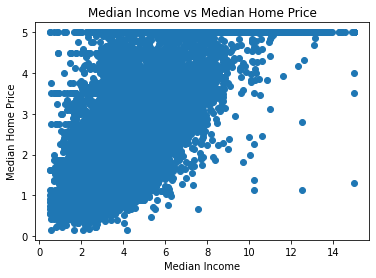

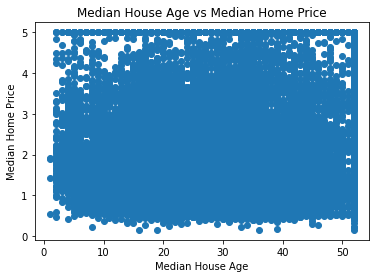

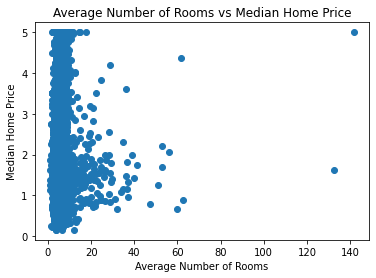

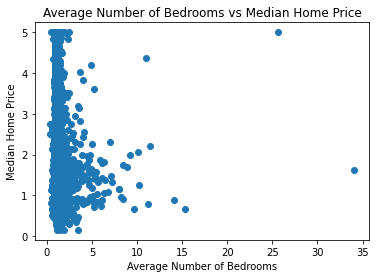

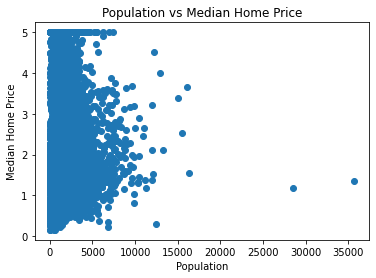

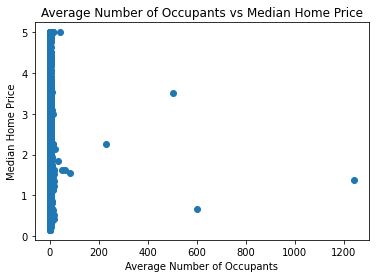

In [6]:
#We will be predicting mediam home value for houses within a block given everything except Latitude and Longitde
#first lets plot all of these things against  median home value

plt.title("Median Income vs Median Home Price")
plt.scatter(cali_data["MedInc"], target)
plt.xlabel("Median Income")
plt.ylabel("Median Home Price")
plt.show()

plt.title("Median House Age vs Median Home Price")
plt.scatter(cali_data["HouseAge"], target)
plt.xlabel("Median House Age")
plt.ylabel("Median Home Price")
plt.show()

plt.title("Average Number of Rooms vs Median Home Price")
plt.scatter(cali_data["AveRooms"], target)
plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Home Price")
plt.show()

plt.title("Average Number of Bedrooms vs Median Home Price")
plt.scatter(cali_data["AveBedrms"], target)
plt.xlabel("Average Number of Bedrooms")
plt.ylabel("Median Home Price")
plt.show()

plt.title("Population vs Median Home Price")
plt.scatter(cali_data["Population"], target)
plt.xlabel("Population")
plt.ylabel("Median Home Price")
plt.show()

plt.title("Average Number of Occupants vs Median Home Price")
plt.scatter(cali_data["AveOccup"], target)
plt.xlabel("Average Number of Occupants")
plt.ylabel("Median Home Price")
plt.show()

In [7]:
#Create temporary dataframe including the target variable to plot a correlation matrix
temp  = cali_data
temp["MedPrice"] = target

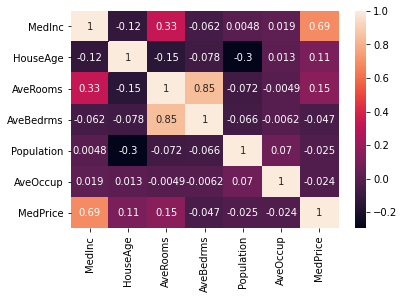

In [8]:
#Create a correaltion matrix to see how everything is correlated
sns.heatmap(temp.corr(), annot=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
seed=44
X_train, X_test, y_train, y_test =  train_test_split(cali_data, target, test_size=0.33, random_state=seed)

In [18]:
#we see that average numbrer of bedrooms and average number of rooms are highly correlated
#In order to reduce the number of variables, we will quickly fit the model and see the pvalues
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
param_grid_lr = {
    "fit_intercept": [True, False],
    "normalize": [True, False]
}
CV_lr = GridSearchCV(estimator=lr, param_grid = param_grid_lr, cv=5)
CV_lr.fit(X_train, y_train)
CV_lr.best_params_

#take those best parameters and use them to fit a final linear regression model
lr_used = LinearRegression(CV_lr.best_params_).fit(X_train, y_train)
res_lr_test = lr_used.predict(X_test)

In [19]:
CV_lr.best_params_

{'fit_intercept': True, 'normalize': True}